In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
pim=pd.read_csv('diabetes.csv')

In [0]:
pim.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
pim.shape

(768, 9)

In [0]:
pim.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
pim['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

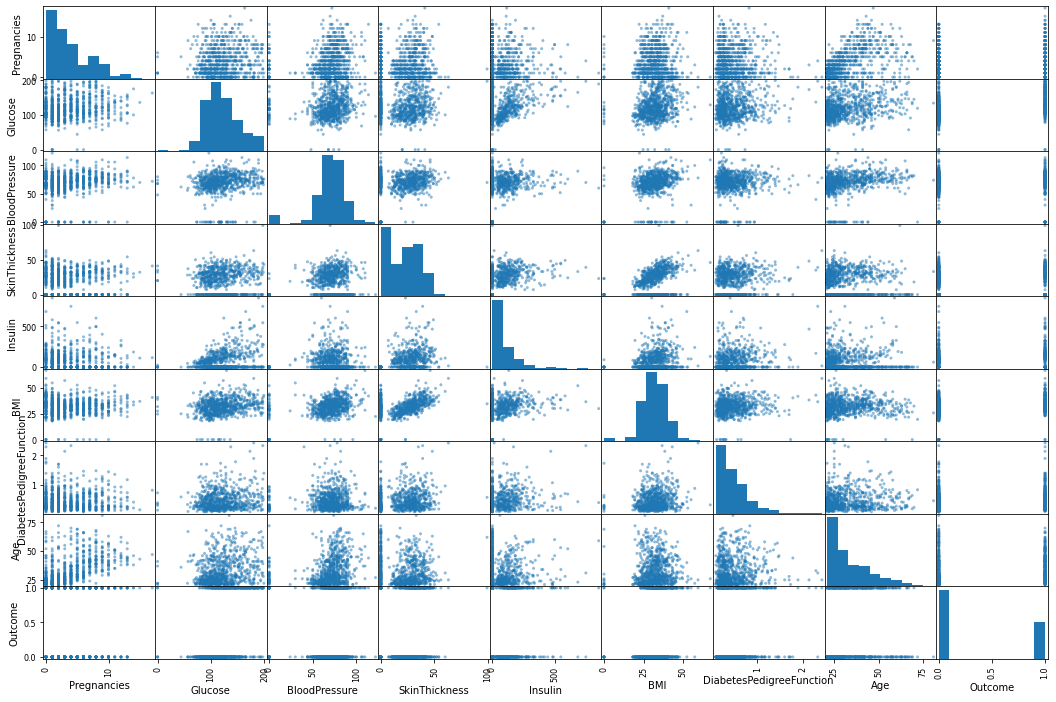

In [0]:
from pandas.plotting import scatter_matrix
scatter_matrix(pim,figsize=(18,12));

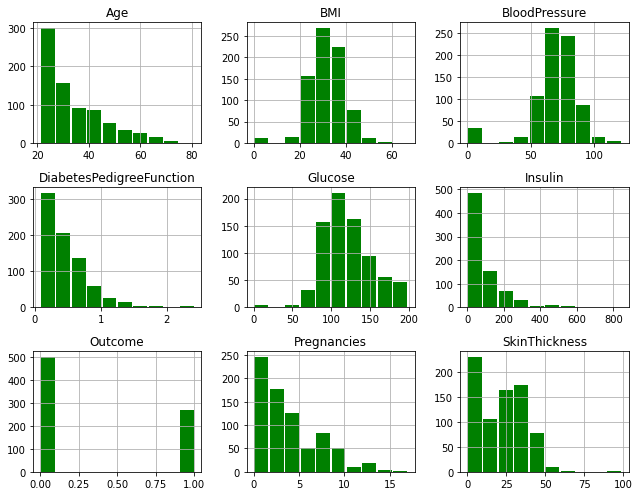

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pim.hist(rwidth = 0.9,color='green',figsize=(9,7))
plt.tight_layout()


In [0]:
pimcorr=pim.corr()
pimcorr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


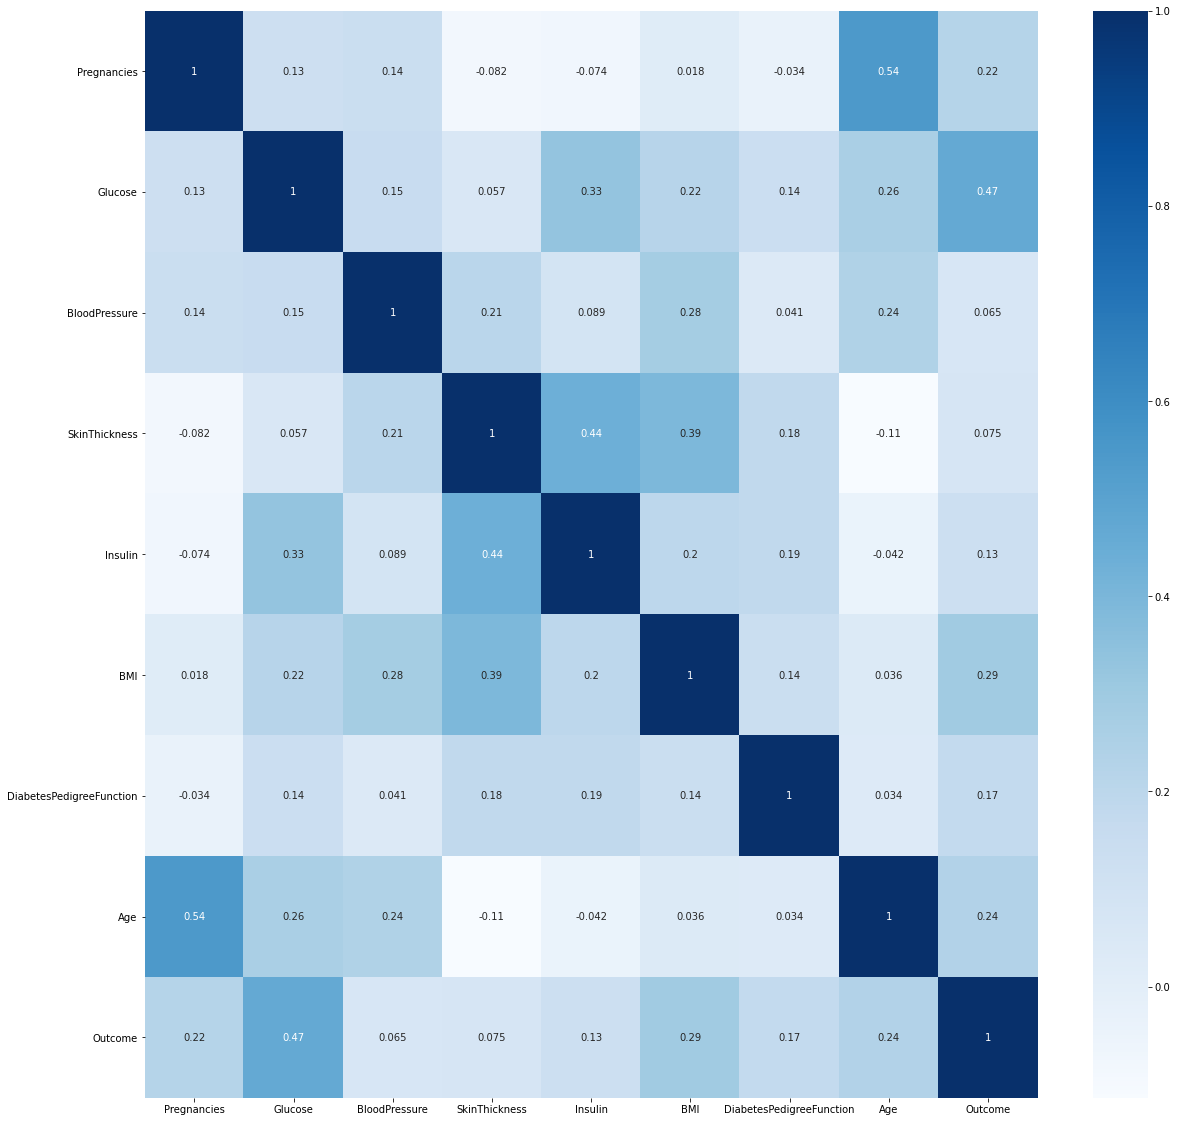

In [0]:
top_corr_features = pimcorr.index 
plt.figure(figsize=(20,20)) #plot heat map
g=sns.heatmap(pim[top_corr_features].corr(),annot=True,cmap="Blues")

In [0]:
Y = pim[['Outcome']]
X = pim.drop(['Outcome'], axis=1)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=365)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
nncl=MLPClassifier()

In [0]:
nncl.fit(X_train, Y_train)
nncl.score(X_test,Y_test)

0.7489177489177489

In [0]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
Xtr = scaler.transform(X)

In [0]:
kfold = KFold(n_splits=5, random_state=7) 
mlp1 = MLPClassifier()
scoring = 'accuracy'
results = cross_val_score(mlp1, Xtr, Y, cv=kfold, scoring=scoring)
print("Accuracy:",results.mean()*100, results.std()) 


Accuracy: 77.22094898565487 0.039283362960816914


In [0]:
pim1=pim.drop(['Age'],axis=1)
pim1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


In [0]:
X1=pim1.drop(['Outcome'],axis=1)
Y1=pim1[['Outcome']]

In [0]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.3, random_state=365)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train1)
X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

In [0]:
nncl1=MLPClassifier()

In [0]:
nncl1.fit(X_train1, Y_train1)
nncl1.score(X_test1,Y_test1)

0.696969696969697

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1)
Xtr1 = scaler.transform(X1)

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
kfold = KFold(n_splits=5, random_state=7) 
mlp2 = MLPClassifier(hidden_layer_sizes=(10,10,10),solver='lbfgs',max_iter=500)
scoring = 'accuracy'
results = cross_val_score(mlp1, Xtr, Y1, cv=kfold, scoring=scoring)
print("Accuracy:",results.mean()*100, results.std()) 


Accuracy: 77.22349545878957 0.047730569964536035
